## This is a small demo regarding Artificial Neural Network from scratch

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


# XOR example

 X1 | X2| Y 
----|----|----
0|0|0
0|1|1
1|0|1
1|1|0


## Initialize data and output

In [2]:
# Initialize input data (X) and target output data (y)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

In [3]:
#check the shapes
print(f"Input: {X.shape}") #Total 4 cases each case two features
print(f"Output: {y.shape}") #Total 4 cases each case one output

Input: (4, 2)
Output: (4, 1)


<p align="center">
  <img src="images/Ann_1.jpg" alt="Computational Graph">
</p>

In [4]:
# Set seed for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0
input_layer_neurons = X.shape[1] #index starts with zero
hidden_layer_neurons = 3 #Total 3 hidden units
output_neuron = 1 #output size

In [5]:
# Weights and biases for the input to hidden layer
W1 = 2 * np.random.random((input_layer_neurons, hidden_layer_neurons)) - 1
b1 = 2 * np.random.random((1, hidden_layer_neurons)) - 1


#Lets print shape
print(f"Weights shape from input to hidden layer w_1: {W1.shape}")
print(f"Bias shape from input to hidden layer b_1: {b1.shape}")



# Weights and biases for the hidden to output layer
W2 = 2 * np.random.random((hidden_layer_neurons, output_neuron)) - 1
b2 = 2 * np.random.random((1, output_neuron)) - 1

#Lets print shape
print(f"Weights shape from hidden layer to output layer w_2: {W2.shape}")
print(f"Bias shape from hidden layer to output layer b_2: {b2.shape}")

Weights shape from input to hidden layer w_1: (2, 3)
Bias shape from input to hidden layer b_1: (1, 3)
Weights shape from hidden layer to output layer w_2: (3, 1)
Bias shape from hidden layer to output layer b_2: (1, 1)


## Forward Propagation with Bias

- Input to Hidden layer
    - Compute pre-activation function $z^{(1)}$
    $$z^{(1)} = X_{4\times2}W^{(1)}_{2\times3} + b^{(1)}_{1\times3} \hspace{10mm}(b^{(1)} \text{ broad casted to all rows})$$ 
    - Apply the Activation function $a^{(1)}$
    $$a^{(1)}=\sigma(z^{(1)})$$



Example
$$
A_{4\times3}\hspace{2mm}B_{1\times3}
= \left(\begin{array}{cc} 
1 & 2&3 \\[10pt] 
4 & 5&6 \\[10pt]
7 & 8&9 \\[10pt] 
5 & 2&3 \\[10pt]
\end{array}\right)_{4\times3} + 
\left(\begin{array}{cc} 
10 & 20&30 \\[10pt]
\end{array}\right)_{1\times3}

\\[10pt]
= \left(\begin{array}{cc} 
1 & 2&3 \\[10pt] 
4 & 5&6 \\[10pt]
7 & 8&9 \\[10pt] 
5 & 2&3 \\[10pt]
\end{array}\right)_{4\times3} + 
\left(\begin{array}{cc} 
10 & 20&30 \\[10pt]
10 & 20&30 \\[10pt]
10 & 20&30 \\[10pt]
10 & 20&30 \\[10pt]
\end{array}\right)_{4\times3}
$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [8]:
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)

print(f"Pre activation function shape z_1: {z1.shape}")
print(f"Activation function shape a_1: {a1.shape}")

Pre activation function shape z_1: (4, 3)
Activation function shape a_1: (4, 3)


- Hidden to Output layer
    - Compute pre-activation function $z^{(1)}$
    $$z^{(2)} = a^{1}_{4\times3}W^{(2)}_{3\times1} + b^{(2)}_{1\times1} \hspace{10mm}(b^{(2)} \text{ broad casted to all rows})$$ 
    - Apply the Activation function $a^{(1)}$
    $$a^{(2)}=RELU(z^{(2)})$$


In [9]:
def relu(x):
    return np.maximum(0, x)

In [10]:
def relu_derivative(x):
    return np.where(x>0, 1, 0)


In [11]:
z2 = np.dot(a1, W2) + b2
a2 = relu(z2)

print(f"Pre activation function shape z_2: {z2.shape}")
print(f"Activation function shape a_2: {a2.shape}")

y_hat = a2

Pre activation function shape z_2: (4, 1)
Activation function shape a_2: (4, 1)


- Calculate error
    $$\hat{y} = a^{(2)}$$
    $$\mathcal{L}= \frac{1}{2n} \sum_{i=1}^{n}(\hat{y_i}- y_i)^2$$

In [12]:
#Calculate mse
loss = np.mean((y - y_hat) ** 2) / 2

print(f"MSE: {loss}")

MSE: 0.25


# Gradients from Output to Hidden layer
Gradient of loss $\mathcal{L}$ w.r.t $\hat{y}$

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}- y_i)
$$

Combining the Gradients
$$
\frac{\partial \mathcal{L}}{\partial z^{(2)}} = (\hat{y}-y).\sigma^{'}(z^{(2)}) = \delta{(2)}
$$

Weights and biases for Output layer
$$
dW^{(2)} = \frac{\partial \mathcal{L}}{dW^{(2)}} = (a^{(1)})^T . \delta^{(2)} \\[10pt]
db^{(2)} = \frac{\partial \mathcal{L}}{db^{(2)}} = \sum \delta^{(2)}
$$


In [13]:
m = y.shape[0]
delta2 = (a2 - y) * sigmoid_derivative(z2)
dW2 = np.dot(a1.T, delta2) / m
db2 = np.sum(delta2, axis=0, keepdims=True) / m

print(dW2.shape, db2.shape)

(3, 1) (1, 1)


# Gradients from Hidden to Input layer


Error term for Hidden layer $\delta^{(1)}$

$$
\delta^{(1)} = (\delta^{(2)}.(W^{(2)})^T).RELU^{'}(z^{(1)}) \\[10pt]
$$
Derivative of Relu function
$$
RELU^{'}(z^{(1)}) =\begin{cases} 
1 & \text{if } z^{(2)} > 0 \\[10pt]
0 & \text{if } z^{(2)} \leq 0 
\end{cases} =  \\[10px]

dW^{(1)} = \frac{\partial \mathcal{L}}{dW^{(1)}} = (X)^T.\delta^{(1)} \\[10pt]
db^{(1)} = \frac{\partial \mathcal{L}}{db^{(1)}} = \sum \delta^{(1)}
$$



In [14]:
# From hidden to input layer
m = y.shape[0]
delta1 = np.dot(delta2, W2.T) * relu_derivative(a1)
dW1 = np.dot(X.T, delta1) / m
db1 = np.sum(delta1, axis=0, keepdims=True) / m
print(dW1.shape, db1.shape)

(2, 3) (1, 3)


In [15]:
eta = 0.1 #learning rate

# Gradient update rule

From Output to Hidden layer
$$
W^{(2)} = W^{(2)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(2)}} \\[10pt] 
b^{(2)} = b^{(2)} - \eta \frac{\partial \mathcal{L}}{\partial b^{(2)}} \\[10pt]
$$
From Hidden to Input layer
$$
W^{(1)} = W^{(1)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(1)}} \\[10pt]
b^{(1)} = b^{(1)} - \eta \frac{\partial \mathcal{L}}{\partial b^{(1)}} \\[10pt]


$$

In [16]:
"""weight updates for all weights and biases
    GD update rule going towards negative gradient direction of the loss surface
"""
W2 -= eta * dW2
b2 -= eta * db2
W1 -= eta * dW1
b1 -= eta * db1


# Place all these together

In [17]:
def initialize(input_layer_neurons, hidden_layer_neurons, output_neuron):
    # Weights and biases for the input to hidden layer
    W1 = 2 * np.random.random((input_layer_neurons, hidden_layer_neurons)) - 1
    b1 = 2 * np.random.random((1, hidden_layer_neurons)) - 1


    #Lets print shape
    print(f"Weights shape from input to hidden layer w_1: {W1.shape}")
    print(f"Bias shape from input to hidden layer b_1: {b1.shape}")



    # Weights and biases for the hidden to output layer
    W2 = 2 * np.random.random((hidden_layer_neurons, output_neuron)) - 1
    b2 = 2 * np.random.random((1, output_neuron)) - 1

    #Lets print shape
    print(f"Weights shape from hidden layer to output layer w_2: {W2.shape}")
    print(f"Bias shape from hidden layer to output layer b_2: {b2.shape}")
    return W1, b1, W2, b2

In [18]:
# Forward pass
def forward_prop(X, W1, b1, W2, b2):
    # From input to hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    # From hidden layer to output
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    return z1, a1, z2, a2

In [19]:
def back_prop(X, y, z1, a1, z2, a2, W2):
    m = y.shape[0]

    # From output to hidden layer
    delta2 = (a2 - y) * sigmoid_derivative(z2)
    dW2 = np.dot(a1.T, delta2) / m
    db2 = np.sum(delta2, axis=0, keepdims=True) / m

    # From hidden to input layer
    delta1 = np.dot(delta2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, delta1) / m
    db1 = np.sum(delta1, axis=0, keepdims=True) / m

    return dW2, db2, dW1, db1

In [20]:
#Lets place all these together
W1, b1, W2, b2 = initialize(input_layer_neurons, hidden_layer_neurons, output_neuron)
epoch = 100000


eta = 9e-2
losses = []


for i in range(epoch):
    z1, a1, z2, a2 = forward_prop(X, W1, b1, W2, b2)

    loss = np.mean((y - a2) ** 2) / 2
    losses.append(loss)


    dW2, db2, dW1, db1 = back_prop(X, y, z1, a1, z2, a2, W2)

    # Update weights and biases
    W2 -= eta * dW2
    b2 -= eta * db2
    W1 -= eta * dW1
    b1 -= eta * db1


    if i %5000 == 0:
        print(f"Epoch {i}, Loss: {loss}")


Weights shape from input to hidden layer w_1: (2, 3)
Bias shape from input to hidden layer b_1: (1, 3)
Weights shape from hidden layer to output layer w_2: (3, 1)
Bias shape from hidden layer to output layer b_2: (1, 1)
Epoch 0, Loss: 0.17363272658771128
Epoch 5000, Loss: 0.0020404471800501765
Epoch 10000, Loss: 0.0007518854821124911
Epoch 15000, Loss: 0.00044510852871441453
Epoch 20000, Loss: 0.0003121518086979408
Epoch 25000, Loss: 0.00023883740321036044
Epoch 30000, Loss: 0.00019269795185521198
Epoch 35000, Loss: 0.0001611057110385499
Epoch 40000, Loss: 0.00013818329830046335
Epoch 45000, Loss: 0.00012082141049409465
Epoch 50000, Loss: 0.00010723375404054708
Epoch 55000, Loss: 9.632538720642176e-05
Epoch 60000, Loss: 8.737619132834755e-05
Epoch 65000, Loss: 7.991180650031093e-05
Epoch 70000, Loss: 7.35916154489829e-05
Epoch 75000, Loss: 6.817606408310471e-05
Epoch 80000, Loss: 6.348431674664282e-05
Epoch 85000, Loss: 5.938235393948043e-05
Epoch 90000, Loss: 5.5766331919720944e-05
Ep

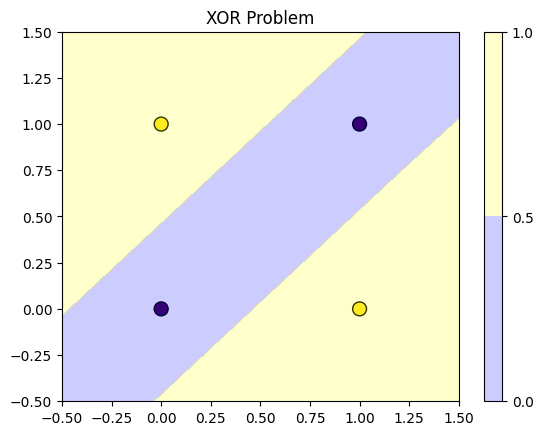

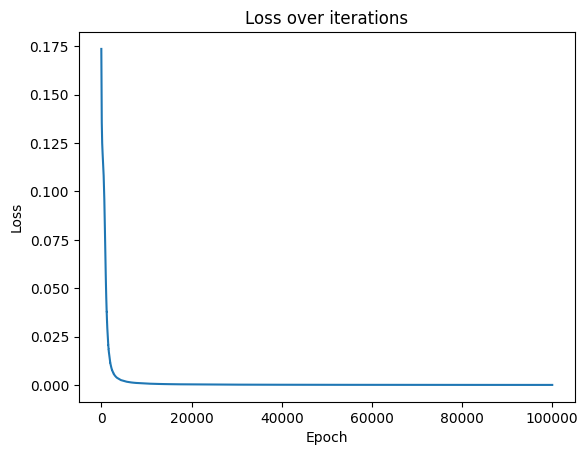

Final predictions:
 [[0]
 [1]
 [1]
 [0]]


In [21]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', marker='o', s=100, edgecolor='k')
plt.title('XOR Problem')

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass on the grid
_, _, _, a2_grid = forward_prop(grid, W1, b1, W2, b2)
a2_grid = a2_grid.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, a2_grid, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'yellow'])
plt.colorbar()
plt.show()

# Plot the loss over iterations
plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Final output
_, _, _, final_output = forward_prop(X, W1, b1, W2, b2)
predictions = np.where(final_output > 0.5, 1, 0)

print("Final predictions:\n", predictions)